In [1]:
#Investment Analysis Assignment :STARTS - 24 April 2018
#CHECKPOINT 1: Starts
#importing numpy and pandas libs
import numpy as np
import pandas as pd
# reading a company.txt  file as a dataframe with tab '\t' and Using encoding = "ISO-8859-1"
companies = pd.read_csv("company.txt", sep="\t", encoding = "palmos")
companies.head()
#Count distict values
companies['permalink'].nunique()

66368

In [2]:
companies.info()
companies['permalink'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


66368

In [3]:
# reading a rounds2 CSV file as a dataframe
rounds2 = pd.read_csv("./rounds2.csv", encoding = "palmos")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
rounds2.info()
#Company Count
rounds2['company_permalink'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


114949

In [5]:
#Renaming all the columns of round2 dataframe after loading from csv
#rounds2.columns=['permalink','funding_round_permalink','funding_round_type','funding_round_code','funded_at','raised_amount_usd']
#ALternative way of Count distict values
#print(len(rounds2['permalink'].unique()))
#Renaming specific column(company_permalink) of round2 dataframe
rounds2.rename(columns={'company_permalink': 'permalink'}, inplace=True)
#Count distict values
rounds2['permalink'].nunique()

90247

In [6]:
#Count only non-null values
rounds2['permalink'].count()

114949

In [7]:
#Changing values in permalink column in companies dataframe to UPPER case
companies['permalink'] = companies['permalink'].str.upper()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
#Changing values in permalink column in rounds2 dataframe to UPPER case
rounds2['permalink'] = rounds2['permalink'].str.upper()
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
#merge rounds2 and companies
master_frame = pd.merge(rounds2,companies,on='permalink',how='outer')
#observations present in master_frame
master_frame.shape[0]

115017

In [10]:
#Clean up data based on raised_amount_usd as most of stats are based on it
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.shape[0]
#checkpoint 1:ENDS

94959

In [11]:
#CHECKPOINT 2:Starts
#Alternative way
#master_frame.groupby('funding_round_type').describe().rank(ascending=False)
#Group master_frame by funding_round_type
by_product_funding_amount = master_frame.groupby('funding_round_type')
#Calculate  average raised_amount_usd in Descending order
by_product_funding_amount['raised_amount_usd'].describe()


,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
convertible_note,1447.0,1.453439e+06,8.043846e+06,0.0,78847.50,272000.0,1000000.0,1.850483e+08
debt_financing,6682.0,1.704353e+07,2.803204e+08,0.0,330484.25,1100000.0,4000000.0,2.127194e+10
equity_crowdfunding,1228.0,5.383682e+05,1.719329e+06,0.0,7000.00,100000.0,395901.0,2.740000e+07
grant,2124.0,4.300576e+06,2.558742e+07,0.0,50000.00,201684.0,1700000.0,7.500000e+08
non_equity_assistance,73.0,4.112031e+05,1.771747e+06,0.0,25000.00,60000.0,125000.0,1.500000e+07
post_ipo_debt,152.0,1.687046e+08,6.024738e+08,70000.0,4000000.00,19950000.0,60000000.0,5.800000e+09
post_ipo_equity,628.0,8.218249e+07,4.691889e+08,77.0,3764794.00,12262852.5,40000000.0,1.066494e+10
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09


In [12]:
#Ranking the Data set to decide on the investment type
by_product_funding_amount['raised_amount_usd'].mean().rank(ascending=False)

funding_round_type
angel                    11.0
convertible_note          9.0
debt_financing            6.0
equity_crowdfunding      13.0
grant                     8.0
non_equity_assistance    14.0
post_ipo_debt             1.0
post_ipo_equity           2.0
private_equity            4.0
product_crowdfunding     10.0
secondary_market          3.0
seed                     12.0
undisclosed               5.0
venture                   7.0
Name: raised_amount_usd, dtype: float64

In [13]:
#Checkpoint 3: Country Analysis - Starts
#Filter out funding_round_type with value venture
investmentType_frame=master_frame.loc[master_frame['funding_round_type']=='venture']
#Cleaning up NAN values for raised_amount_usd
investmentType_frame = investmentType_frame[~np.isnan(investmentType_frame['raised_amount_usd'])]
#check out put data frame
investmentType_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 15 columns):
permalink                  50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funding_round_code         28043 non-null object
funded_at                  50228 non-null object
raised_amount_usd          50228 non-null float64
name                       50219 non-null object
homepage_url               47611 non-null object
category_list              49719 non-null object
status                     50219 non-null object
country_code               48105 non-null object
state_code                 47362 non-null object
region                     47509 non-null object
city                       47509 non-null object
founded_at                 40592 non-null object
dtypes: float64(1), object(14)
memory usage: 6.1+ MB


In [14]:
import pymysql
# create a connection object 'conn'
conn = pymysql.connect(host="localhost",
                     user="root",
                      passwd="root",
                      db="world")
# create a cursor object c
c = conn.cursor()
# execute a query using c.execute
c.execute("select code,Name from country;")
# getting the first row of data as a tuple
all_rows = c.fetchall()
# notice that it returns a tuple of tuples: each row is a tuple
print(type(all_rows))

# printing the first few rows
print(all_rows[:2])
df_database = pd.DataFrame(list(all_rows), columns=["Code", "Country"])
df_database.head()

<class 'tuple'>
(('ABW', 'Aruba'), ('AFG', 'Afghanistan'))


,Code,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALB,Albania


In [15]:
fromPDF_English_countries = ['Botswana',
'Cameroon',
'Ethiopia',
'Eritrea',
'The Gambia',
'Ghana',
'Kenya',
'Lesotho',
'Liberia',
'Malawi',
'Mauritius',
'Namibia',
'Nigeria',
'Rwanda',
'Seychelles',
'Sierra Leone',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'anzania',
'Uganda',
'Zambia',
'Zimbabwe',
'Antigua and Barbuda',
'The Bahamas',
'Barbados',
'Belize',
'Canada',
'Dominica',
'Grenada',
'Guyana',
'Jamaica',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Trinidad and Tobago',
'United States',
'India',
'Pakistan',
'Philippines',
'Singapore',
'Australia',
'Fiji',
'Kiribati',
'Marshall Islands',
'Federated States of Micronesia',
'Nauru',
'New Zealand',
'Palau',
'Papua New Guinea',
'Samoa',
'Solomon Islands',
'Tonga',
'Tuvalu',
'Vanuatu',
'Ireland',
'Malta',
'United Kingdom',
]
english_df = pd.DataFrame({'Country':fromPDF_English_countries})
print(english_df.info())
english_speakin=pd.merge(df_database,english_df,on='Country')
english_speakin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
Country    59 non-null object
dtypes: object(1)
memory usage: 552.0+ bytes
None


,Code,Country
0,ATG,Antigua and Barbuda
1,AUS,Australia
2,BLZ,Belize
3,BRB,Barbados
4,BWA,Botswana


In [16]:
#change column name of english_speakin
english_speakin.rename(columns={'Code': 'country_code'}, inplace=True)

#Get dataframe with english speaking countries
english_master_frame = pd.merge(investmentType_frame,english_speakin,on='country_code')
english_master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41053 entries, 0 to 41052
Data columns (total 16 columns):
permalink                  41053 non-null object
funding_round_permalink    41053 non-null object
funding_round_type         41053 non-null object
funding_round_code         22208 non-null object
funded_at                  41053 non-null object
raised_amount_usd          41053 non-null float64
name                       41053 non-null object
homepage_url               39117 non-null object
category_list              40824 non-null object
status                     41053 non-null object
country_code               41053 non-null object
state_code                 40716 non-null object
region                     40864 non-null object
city                       40864 non-null object
founded_at                 34317 non-null object
Country                    41053 non-null object
dtypes: float64(1), object(15)
memory usage: 5.3+ MB


In [17]:
#Group by Country and country_code
by_Country =english_master_frame.groupby(['Country','country_code'])
#Finding the Top 3 English-Speaking Countries
by_Country['raised_amount_usd'].sum().sort_values(ascending=False)
#Checkpoint 3: Country Analysis :ENDS

Country                country_code
United States          USA             4.225108e+11
United Kingdom         GBR             2.024563e+10
India                  IND             1.439186e+10
Canada                 CAN             9.583332e+09
Singapore              SGP             2.793918e+09
Ireland                IRL             1.676131e+09
Australia              AUS             1.322935e+09
New Zealand            NZL             4.483164e+08
Nigeria                NGA             2.454400e+08
South Africa           ZAF             2.340629e+08
Philippines            PHL             1.144997e+08
Pakistan               PAK             8.312500e+07
Kenya                  KEN             5.394000e+07
Ghana                  GHA             3.120000e+07
Malta                  MLT             1.772830e+07
Saint Kitts and Nevis  KNA             1.500000e+07
Trinidad and Tobago    TTO             8.500000e+06
Uganda                 UGA             2.500000e+06
Botswana               BWA  

In [18]:
#filter_top9 countries
#Top9 investment countries data frame
top9=english_master_frame.loc[english_master_frame['country_code'].isin(['USA','GBR','IND','CAN','SGP','IRL','AUS','NZL','NGA'])]
top9.head(50)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,India
1,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,India
2,/ORGANIZATION/247-LEARNING-PRIVATE,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,India
3,/ORGANIZATION/3DSOC,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India
4,/ORGANIZATION/3DSOC,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India
5,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,India
6,/ORGANIZATION/ACB-INDIA-LIMITED,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,C,31-03-2008,25090000.0,ACB (India) Limited,http://www.aryancoal.com,Energy|Mining Technologies,operating,IND,10,New Delhi,Gurgaon,01-01-1997,India
7,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,India
8,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,India
9,/ORGANIZATION/AGROSTAR,/funding-round/7f12c8c8e24c3629d89f23e99168f8be,venture,NaN,13-08-2015,4000000.0,Agrostar,http://agrostar.in/,E-Commerce,operating,IND,16,Pune,Pune,NaN,India


In [19]:
#Checkpoint 4: Sector Analysis 1 :STARTS
#Load sector details from mapping.csv
sector_mapping = pd.read_csv("./mapping.csv", encoding = "palmos")
#check data loaded to sector_mapping
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [20]:
#Using pandas melt to reshape the mapping.csv data
df_mapping=pd.melt(sector_mapping,id_vars=["category_list"],var_name="primary_sector",value_name="count")
df_mapping.head()

,category_list,primary_sector,count
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [21]:
#filter all the rows with count 1
is_count1 =  df_mapping['count']==1
df1_count1_sector = df_mapping[is_count1]
df1_count1_sector.shape

(688, 3)

In [22]:
sector_master_frame = pd.merge(top9,df1_count1_sector,on='category_list')
#sector_master_frame.shape
#shape output(21739, 19)
sector_master_frame.head()
#Checkpoint 4: Sector Analysis 1:ENDS

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,count
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,India,Entertainment,1
1,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,United States,Entertainment,1
2,/ORGANIZATION/GENIUS-MONKEY,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,2000000.0,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,United States,Entertainment,1
3,/ORGANIZATION/GLASS-MEDIA,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,30000.0,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,United States,Entertainment,1
4,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,NaN,17-04-2015,125000.0,Marine Construction Technologies,http://marinecontech.org/,Media,operating,USA,WA,Seattle,Seattle,01-01-2012,United States,Entertainment,1


In [23]:
#change column name of category_list to main_sector
#sector_master_frame.rename(columns={'category_list': 'main_sector'}, inplace=True)
sector_master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,count
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,India,Entertainment,1
1,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,United States,Entertainment,1
2,/ORGANIZATION/GENIUS-MONKEY,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,2000000.0,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,United States,Entertainment,1
3,/ORGANIZATION/GLASS-MEDIA,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,30000.0,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,United States,Entertainment,1
4,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,NaN,17-04-2015,125000.0,Marine Construction Technologies,http://marinecontech.org/,Media,operating,USA,WA,Seattle,Seattle,01-01-2012,United States,Entertainment,1


In [24]:
#Checkpoint 5: Sector Analysis 2:STARTS
#separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range
#D1 Statistics :Starts 
#Creating D1 with top country USA - United States
top1=sector_master_frame.loc[sector_master_frame['country_code'].isin(['USA'])]
top1 = top1[~np.isnan(top1['raised_amount_usd'])]
D1 =top1[(top1['raised_amount_usd'] >= 5000000) & (top1['raised_amount_usd'] <=15000000 )]
#Total number of Investments (count)
D1.shape
#output->(6035, 19)
#Total amount of investment (USD)
D1['raised_amount_usd'].sum()
#output ->54037078804.0

54037078804.0

In [25]:
#Find Top Sector based on no. of investment-wise
by_sector_d1 = D1.groupby(['primary_sector'])
by_sector_d1['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Others                                     2069
Cleantech / Semiconductors                 1737
Health                                      601
News, Search and Messaging                  552
Manufacturing                               411
Social, Finance, Analytics, Advertising     343
Entertainment                               196
Blanks                                       86
Automotive & Sports                          40
Name: raised_amount_usd, dtype: int64

In [26]:
#For point 3 (second best sector count-wise), which company received the highest investment?
large1_D1=D1.loc[D1['primary_sector'].isin(['Others'])]
#large1_D1.shape
#Output->(2069, 19)
#Group by company name
by_sector_large1_D1 = large1_D1.groupby(['name'])
#sort companies list based on the total raised_amout_usd of each company
by_sector_large1_D1['raised_amount_usd'].sum().sort_values(ascending=False)

name
Virtustream                        64300000.0
Capella Photonics                  54968051.0
Approva                            50100000.0
Bit9                               48433533.0
BTI Systems                        48000000.0
Vormetric                          45000000.0
Redfin                             44800000.0
Blazent                            44075260.0
3VR                                44000000.0
Convio                             42750000.0
Colubris Networks                  42000000.0
ExaGrid Systems                    41717024.0
Delivery Agent                     41447137.0
MOGL                               41436966.0
ForeScout Technologies, Inc.       41250000.0
ScienceLogic                       41000000.0
Vyatta                             40800000.0
Mantara                            40399999.0
Spigit                             40200000.0
newScale                           40000000.0
PMW Technologies                   39890477.0
Sipera Systems               

In [27]:
#For point 4 (second best sector count-wise), which company received the highest investment?
secoundlarge_D1=D1.loc[D1['primary_sector'].isin(['Cleantech / Semiconductors'])]
#secoundlarge_D1.shape
#output->(1737, 19)
#Group by company name
by_sector_secoundlarge_D1 = secoundlarge_D1.groupby(['name'])
#sort companies list based on the total raised_amout_usd of each company
by_sector_secoundlarge_D1['raised_amount_usd'].sum().sort_values(ascending=False)
#D1 Statistics ENDS

name
Tigo Energy                     68739496.0
ForSight Labs                   61300001.0
SCIenergy                       55375423.0
ALung Technologies              54110403.0
Stretch                         52000000.0
iRhythm Technologies            50500000.0
Ocular Therapeutix              49500000.0
Aviir                           49150000.0
Stemgent                        47855190.0
Zenverge                        47049999.0
Novomer                         45600000.0
DNAnexus                        45000000.0
Akros Silicon                   44399874.0
Xceive                          43976690.0
Catabasis Pharmaceuticals       43913736.0
Athenix                         43500000.0
ClariPhy Communications         43272155.0
Danotek Motion Technologies     42700000.0
SoloPower                       42599999.0
Gridco                          42499992.0
eASIC                           42116000.0
Tocagen                         42086502.0
Discera                         41811000.0
WiSpry

In [28]:
#D2 Statistics STARTS
#Creating D2 with top country GBR - United Kingdom
top2=sector_master_frame.loc[sector_master_frame['country_code'].isin(['GBR'])]
top2 = top2[~np.isnan(top2['raised_amount_usd'])]
D2 =top2[(top2['raised_amount_usd'] >= 5000000) & (top2['raised_amount_usd'] <=15000000 )]

#Total number of Investments (count)
D2.shape
#output->(344, 19)
#Total amount of investment (USD)
D2['raised_amount_usd'].sum()
#output ->3029216305.0


3029216305.0

In [29]:
#Find Top Sector based on no. of investment-wise for D2
by_sector_d2 = D2.groupby(['primary_sector'])
by_sector_d2['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Cleantech / Semiconductors                 107
Others                                     106
News, Search and Messaging                  31
Manufacturing                               29
Entertainment                               28
Social, Finance, Analytics, Advertising     20
Health                                      13
Blanks                                       7
Automotive & Sports                          3
Name: raised_amount_usd, dtype: int64

In [30]:
#For point 3 (second best sector count-wise), which company received the highest investment?
large1_D2=D2.loc[D2['primary_sector'].isin(['Cleantech / Semiconductors'])]
#large1_D2.shape
#Output->(107, 19)
#Group by company name
by_sector_large1_D2 = large1_D2.groupby(['name'])
#sort companies list based on the total raised_amout_usd of each company
by_sector_large1_D2['raised_amount_usd'].sum().sort_values(ascending=False)

name
EUSA Pharma                            35600000.0
Elixent                                25000000.0
Immune Targeting Systems               20320961.0
Plaxica                                19940192.0
Xention                                19051289.0
Oxford Photovoltaics                   18820357.0
Autifony Therapeutics                  17836350.0
MicroEmissive Displays Group           16485919.0
CamSemi                                16190000.0
Oxitec                                 15542270.0
Imagination Technologies               15033479.0
Onyvax                                 14906222.0
Aquapharm Biodiscovery                 14616758.0
Lectus Therapeutics                    14257949.0
XMOS                                   14000000.0
Phosphate Therapeutics                 13881000.0
Sophia Genetics                        13750000.0
Intelligent Energy                     13600000.0
Apitope                                13456610.0
KalVista Pharmaceuticals               132073

In [31]:
#For point 4 (second best sector count-wise), which company received the highest investment?
secoundlarge_D2=D2.loc[D2['primary_sector'].isin(['Others'])]
#secoundlarge_D2.shape
#output->(106, 19)
#Group by company name
by_sector_secoundlarge_D2 = secoundlarge_D2.groupby(['name'])
#sort companies list based on the total raised_amout_usd of each company
by_sector_secoundlarge_D2['raised_amount_usd'].sum().sort_values(ascending=False)
#D2 Statistics ENDS

name
Electric Cloud                            37000000.0
SenSage                                   36250000.0
Enigmatec                                 32500000.0
OpenCloud                                 27972766.0
MyOptique Group                           27694613.0
Notonthehighstreet                        26900000.0
ACS Clothing                              26239014.0
Tribold                                   26000000.0
ip.access                                 25000000.0
Eglue Business Technologies               22000000.0
Aepona                                    20000000.0
Njini                                     18000000.0
EnvironmentIQ                             15000000.0
Azure Solutions                           15000000.0
Ocapo                                     14394888.0
Celona Technologies                       14000000.0
Helveta                                   13697597.0
Six Degrees Group                         12529381.0
Bathrooms.com                            

In [32]:
#D3 Statistics STARTS

In [33]:
#Creating D3 with top country  IND - India
top3=sector_master_frame.loc[sector_master_frame['country_code'].isin(['IND'])]
top3 = top3[~np.isnan(top3['raised_amount_usd'])]
D3=top3[(top3['raised_amount_usd'] >= 5000000) & (top3['raised_amount_usd'] <=15000000 )]

#Total number of Investments (count)
#D3.shape
#output->(175, 19)
#Total amount of investment (USD)
D3['raised_amount_usd'].sum()
#output ->1544298277.0

1544298277.0

In [34]:
#Find Top Sector based on no. of investment-wise for D3
by_sector_d3 = D3.groupby(['primary_sector'])
by_sector_d3['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Others                                     74
News, Search and Messaging                 31
Entertainment                              19
Cleantech / Semiconductors                 14
Health                                     13
Manufacturing                              11
Social, Finance, Analytics, Advertising     9
Blanks                                      2
Automotive & Sports                         2
Name: raised_amount_usd, dtype: int64

In [35]:
#For point 3 (second best sector count-wise), which company received the highest investment?
large1_D3=D3.loc[D3['primary_sector'].isin(['Others'])]
large1_D2.shape
#Output->(107, 19)
#Group by company name
by_sector_large1_D3 = large1_D3.groupby(['name'])
#sort companies list based on the total raised_amout_usd of each company
by_sector_large1_D3['raised_amount_usd'].sum().sort_values(ascending=False)

name
FirstCry.com                               39000000.0
Myntra                                     38000000.0
CommonFloor                                32900000.0
Pepperfry.com                              28000000.0
ItzCash Card Ltd.                          25000000.0
NxtGen Data Center & Cloud Services        22300000.0
India Property Online                      19000000.0
Hippocampus Learning Centres               18000000.0
Voylla Retail Pvt. Ltd.                    15000000.0
iProf Learning Solutions                   15000000.0
Tejas Networks India                       15000000.0
iPolicy Networks                           15000000.0
EximSoft-Trianz                            14000000.0
Quick Heal Technologies                    13000000.0
Prabhat fresh                              12800000.0
Power2SME                                  12800000.0
Firepro Systems                            12000000.0
Snapdeal                                   12000000.0
Ariisto                

In [36]:
#For point 4 (second best sector count-wise), which company received the highest investment?
secoundlarge_D3=D3.loc[D3['primary_sector'].isin(['News, Search and Messaging'])]
secoundlarge_D3.shape
#output->(31, 19)
#Group by company name
by_sector_secoundlarge_D3 = secoundlarge_D3.groupby(['name'])
#sort companies list based on the total raised_amout_usd of each company
by_sector_secoundlarge_D3['raised_amount_usd'].sum().sort_values(ascending=False)
#D3 Statistics ENDS
#Checkpoint 5: Sector Analysis 2 :ENDS

name
GupShup                       33000000.0
IMImobile                     23000000.0
SMS GupShup                   22000000.0
Roadrunnr                     21000000.0
Guruji                        15000000.0
Bluestone.com                 15000000.0
Mobile2Win India              15000000.0
Quikr                         14000000.0
TeleDNA                       10490000.0
UrbanClap                     10000000.0
One97 Communications          10000000.0
Four Interactive              10000000.0
Shadowfax Technologies         8500000.0
People Interactive (India)     8000000.0
Ezetap                         8000000.0
Nazara Technologies            7000000.0
redBus.in                      6428770.0
SureWaves                      5700000.0
LocalBanya                     5000000.0
LocalOye                       5000000.0
Zoomo                          5000000.0
Chakpak Media                  5000000.0
Belong                         5000000.0
Name: raised_amount_usd, dtype: float64

In [37]:
#Checkpoint 6: Plots STARTS
import matplotlib.pyplot as plt
import seaborn as sns


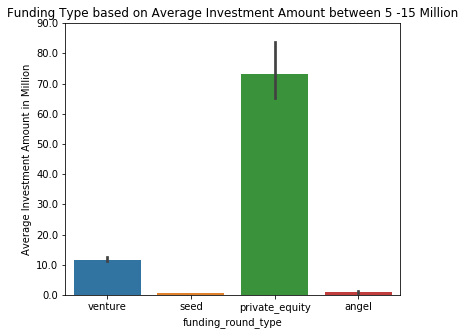

In [38]:
#A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.
plt.figure(figsize=(6,5))
#Filter master_dataframe to pull averge funds as per spark Funds initial investment analysis Table 2.1
plot_master_frame=master_frame[["funding_round_type","raised_amount_usd"]].loc[master_frame.funding_round_type.isin( ['angel','seed','venture','private_equity'])]
scale_change=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=plot_master_frame, estimator=np.mean)
#Trying to change th yscale for better view
#plt.plot([1000000, 5000000, 10000000, 15000000,20000000])
plt.yticks(scale_change.get_yticks(),scale_change.get_yticks()/1000000)
#Label the y scale for business understanding
plt.ylabel('Average Investment Amount in Million')
#chart Title
plt.title("Funding Type based on Average Investment Amount between 5 -15 Million")
plt.show()

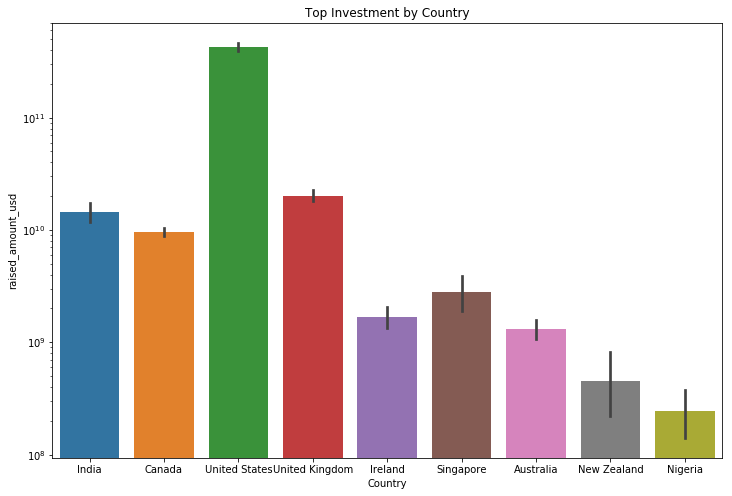

In [39]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
plt.figure(figsize=(12, 8))
#sns.barplot(x='Country', y='raised_amount_usd', data=top9)
sns.barplot(x='Country', y='raised_amount_usd', data=top9, estimator=np.sum)
#yscale to log for better visualization
plt.yscale('log')
#chart Title
plt.title("Top Investment by Country")
plt.show()

In [40]:
#Creating Dataframe to plot top 3 sector and top 3 countries
new_top3_sector_countries=sector_master_frame.loc[sector_master_frame['primary_sector'].isin(['Cleantech / Semiconductors','Others','Health'])]
new_top3_sector_countries.head()

#Top 3 countries
top3_countries=new_top3_sector_countries.loc[new_top3_sector_countries['country_code'].isin(['USA','GBR','IND'])]
top3_countries_bysector=top3_countries.groupby(['Country','primary_sector'])
top3_countries_bysector.head()
#was able to map the desired dataframe but having trouble in plotting
print(top3_countries_bysector['primary_sector'].count())
new_top3=pd.DataFrame(top3_countries_bysector['primary_sector'].count())
print(type(new_top3))
#Converting a Pandas GroupBy object to DataFrame
print(new_top3.index)
new_top3.add_suffix('_Count').reset_index()
#Preparing new_top3_finaldf ready for plotting
new_top3_finaldf=pd.DataFrame(new_top3.add_suffix('_Count').reset_index())
new_top3_finaldf.info()

Country         primary_sector            
India           Cleantech / Semiconductors      33
                Health                          23
                Others                         180
United Kingdom  Cleantech / Semiconductors     341
                Health                          50
                Others                         368
United States   Cleantech / Semiconductors    6036
                Health                        2181
                Others                        5926
Name: primary_sector, dtype: int64
<class 'pandas.core.frame.DataFrame'>
MultiIndex(levels=[['India', 'United Kingdom', 'United States'], ['Cleantech / Semiconductors', 'Health', 'Others']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Country', 'primary_sector'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
Country                 9 non-null object
primary_sector          9 non-null obje

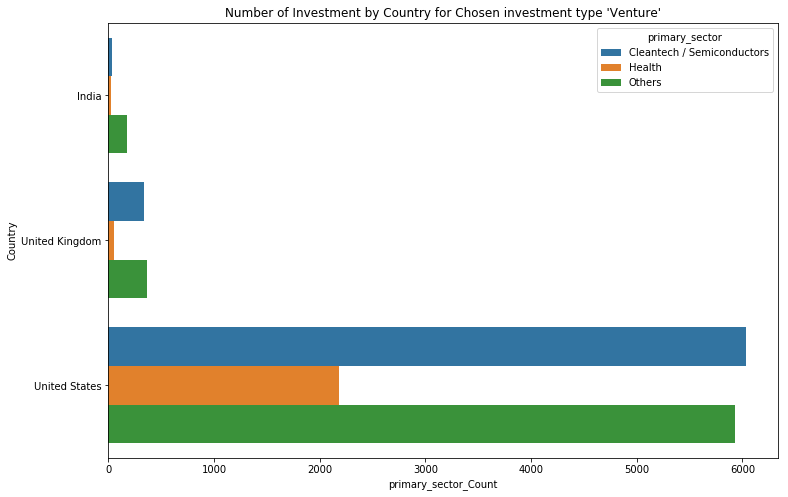

In [41]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for Chosen investment Venture
plt.figure(figsize=(12, 8))
#sns.barplot(x='Country', y='raised_amount_usd', data=top9)
scale_change_plot3=sns.barplot(x='primary_sector_Count', y='Country', hue='primary_sector',data=new_top3_finaldf)
#Trying to change th xscale for better view
#plt.xticks(scale_change_plot3.get_xticks(),scale_change_plot3.get_xticks())
plt.title("Number of Investment by Country for Chosen investment type 'Venture'")
plt.show()

In [42]:
#Investment Analysis Assignment : ENDS - 05 May 2018